# Power analysis failure

In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import os
%matplotlib inline

#### Reading in the data

In [2]:
location = os.path.join(os.environ.get("WORKDIR"),"2017_power_question")
zfile = os.path.join(location,"zstat1.nii.gz")
maskfile = os.path.join(location,"mask.nii.gz")

zstat = nib.load(zfile).get_data()
mask = nib.load(maskfile).get_data()

#### Now I select all the voxels that are in the mask, and not exactly 0

In [3]:
zs = zstat[mask==1]
zs = zs[zs!=0]

#### I generate the theoretical null distribution

In [4]:
x = np.arange(-5,5,0.001)
y = scipy.stats.norm.pdf(x)

#### Now you can see how much the distribution of z-statistics resembles the theoretical null distribution.  Therefore, the power analysis procedure could not find evidence for an effect.

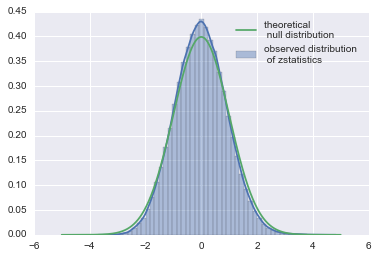

In [5]:
sns.distplot(zs,label="observed distribution \n of zstatistics")
plt.plot(x,y,label="theoretical \n null distribution")
plt.legend()